2.analysis on how much revenue would increase or stabilize base on selling affordable housing
2.1 get percentage of americans that can afford a home with normal distribution exclude 1% earners
2.2 get percentage of americans that will be able to afford a home with changes in price using normal distribution exclude 1% earners
2.3 check distribution against average median salaries exclude 1% earners

The company is called Inviting homes and they own 2930 homes normal distribution will be based on  house-prices_features data set pull from kaggle

In [11]:
import math 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
plt.style.use('fivethirtyeight')
import datetime
import pandas as pd
import sqlalchemy as sa



In [12]:
import sqlalchemy as sa
import pandas as pd
import urllib

params_housing = urllib.parse.quote_plus(
    "DRIVER={ODBC Driver 18 for SQL Server};"
    "SERVER=localhost;"
    "DATABASE=Housing;"
    "UID=SA;"
    "PWD=SuperK_0606$;"
    "Encrypt=no;"
    "TrustServerCertificate=yes"
)

connection_string_Housing = f"mssql+pyodbc:///?odbc_connect={params_housing}"
engine_housing = sa.create_engine(connection_string_Housing)

Housing_features_df = pd.read_sql('SELECT * from [house-prices_features]', engine_housing)

print(Housing_features_df.head())



  Order         PID MS_SubClass MS_Zoning Lot_Frontage Lot_Area Street Alley  \
0     1  0526301100         020        RL          141    31770   Pave    NA   
1     2  0526350040         020        RH           80    11622   Pave    NA   
2     3  0526351010         020        RL           81    14267   Pave    NA   
3     4  0526353030         020        RL           93    11160   Pave    NA   
4     5  0527105010         060        RL           74    13830   Pave    NA   

  Lot_Shape Land_Contour  ... Pool_QC  Fence Misc_Feature Misc_Val Mo_Sold  \
0       IR1          Lvl  ...      NA     NA           NA        0       5   
1       Reg          Lvl  ...      NA  MnPrv           NA        0       6   
2       IR1          Lvl  ...      NA     NA         Gar2    12500       6   
3       Reg          Lvl  ...      NA     NA           NA        0       4   
4       IR1          Lvl  ...      NA  MnPrv           NA        0       3   

  Yr_Sold Sale_Type Sale_Condition SalePrice curre

/home/kalle/kdatascience/lib/python3.12/site-packages/pandas/io/sql.py:1648: SAWarning: Unrecognized server version info '17.0.800.3'.  Some SQL Server features may not function properly.
  con = self.exit_stack.enter_context(con.connect())


0.8277311419853731
2.8542662116040955


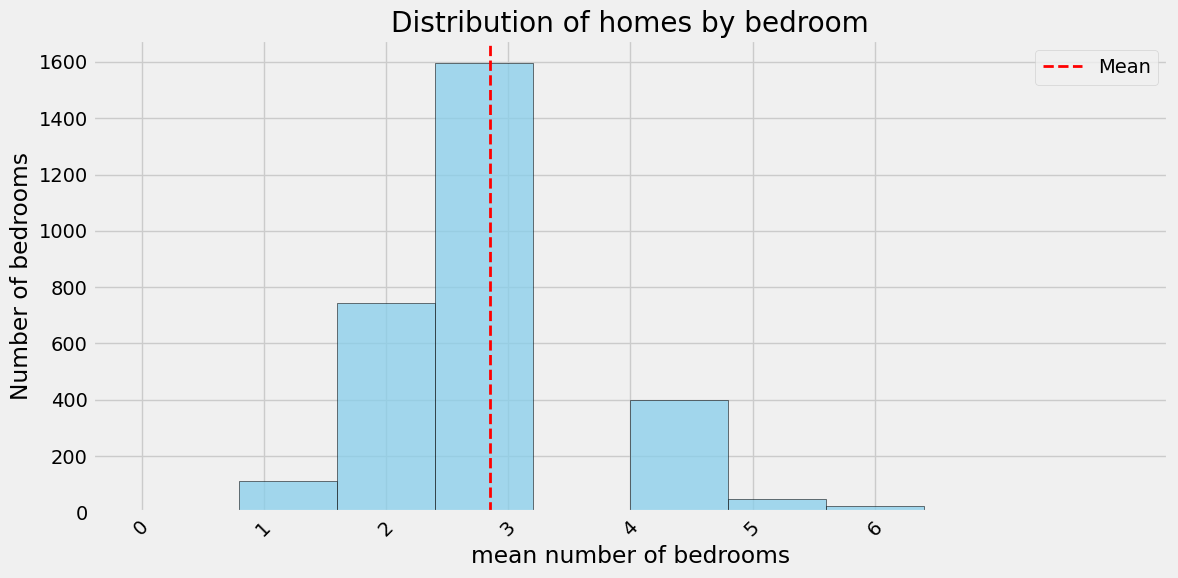

In [13]:
from scipy import stats
from scipy.stats import norm
mean_bedrooms = Housing_features_df['Bedroom_AbvGr'].mean()
std_bedrooms = Housing_features_df['Bedroom_AbvGr'].std()
total_houses = 2930
print (std_bedrooms)
print (mean_bedrooms)

#set bins
bins = [0,1,2,3,4,5,6]

#plot
plt.figure(figsize=(12,6))
plt.hist(Housing_features_df['Bedroom_AbvGr'], edgecolor='black', color='skyblue', alpha=0.75)
plt.title('Distribution of homes by bedroom')
plt.xlabel('mean number of bedrooms')
plt.ylabel('Number of bedrooms')
plt.xticks(bins, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.axvline(Housing_features_df['Bedroom_AbvGr'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.show()



#stat, p = stats.shapiro(Housing_features_df['BedroomAbvGr'])
#print(f"Shapiro-Wilk test: Statistic = {stat:.4f}, p-value = {p:.4f}")

In [14]:
import sqlalchemy as sa
import pandas as pd
import urllib

params_worker = urllib.parse.quote_plus(
    "DRIVER={ODBC Driver 18 for SQL Server};"
    "SERVER=localhost;"
    "DATABASE=Worker_pay;"
    "UID=SA;"
    "PWD=SuperK_0606$;"
    "Encrypt=no;"
    "TrustServerCertificate=yes"
)

connection_string_worker = f"mssql+pyodbc:///?odbc_connect={params_worker}"
engine_worker = sa.create_engine(connection_string_worker)

wage_df = pd.read_sql('SELECT * from [bls_national_may2023_wage_data]', engine_worker)

print(wage_df['A_MEAN'].head(10))
print(wage_df['A_MEAN'].describe())

0    137750.00
1    136100.00
2    258900.00
3    258900.00
4    129330.00
5    129330.00
6     68140.00
7     68140.00
8    159960.00
9    152620.00
Name: A_MEAN, dtype: object
count     1402
unique    1026
top          0
freq         7
Name: A_MEAN, dtype: object


/home/kalle/kdatascience/lib/python3.12/site-packages/pandas/io/sql.py:1648: SAWarning: Unrecognized server version info '17.0.800.3'.  Some SQL Server features may not function properly.
  con = self.exit_stack.enter_context(con.connect())


Median:61030.0
Mean:73439.51497860199
standard deviation:45158.65887859376


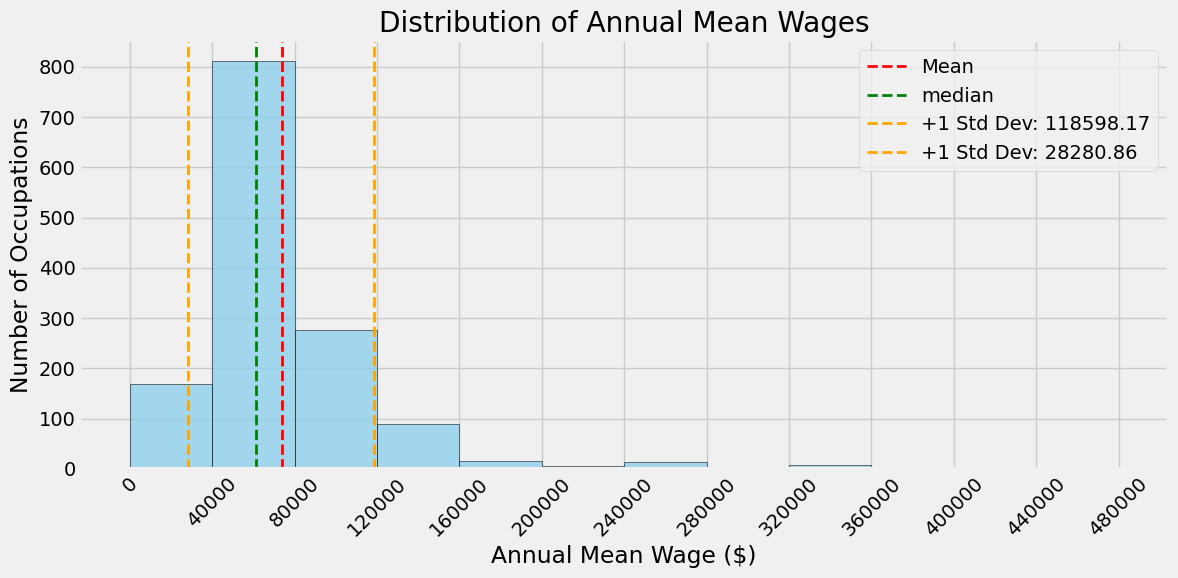

In [15]:
from scipy import stats
from scipy.stats import norm

wage_df['A_MEAN'] = pd.to_numeric(wage_df['A_MEAN'], errors='coerce')

print (f'Median:{wage_df['A_MEAN'].median()}')
print (f'Mean:{wage_df['A_MEAN'].mean()}')
print (f'standard deviation:{wage_df['A_MEAN'].std()}')
mean = wage_df['A_MEAN'].mean()
std_dev = wage_df['A_MEAN'].std()

wage_df = wage_df.dropna(subset=['A_MEAN'])

# Remove 0 or extremely low values
wage_df = wage_df[wage_df['A_MEAN'] > 10000] 

min_val = int(wage_df['A_MEAN'].min() // 40000 * 40000)
max_val = int(wage_df['A_MEAN'].max() // 40000 * 40000 + 40000)
bins = list(range(min_val, max_val + 1, 40000))

plt.figure(figsize=(12,6))
plt.hist(wage_df['A_MEAN'], bins=bins, edgecolor='black', color='skyblue', alpha=0.75)
plt.title('Distribution of Annual Mean Wages')
plt.xlabel('Annual Mean Wage ($)')
plt.ylabel('Number of Occupations')
plt.xticks(bins, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.axvline(wage_df['A_MEAN'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(wage_df['A_MEAN'].median(), color='green', linestyle='dashed', linewidth=2, label='median')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=2, label=f'+1 Std Dev: {mean+std_dev:.2f}')
plt.axvline(mean - std_dev, color='orange', linestyle='dashed', linewidth=2, label=f'+1 Std Dev: {mean-std_dev:.2f}')

plt.legend()
plt.show()


We own 2930 homes worth 814728517.32$ if we sold them all today there are alot of outliers driving up the mean of earners so I will use the median from the data table instead. we can reference the Due_diligence sql query and see that about 1557 of our homes that are 3 bedrooms or less are out of the range of affordability for most americans making about 48000 a year all togther 1898 of our homes are out of that range all togther. that means that about 65% of hour homes are unaffordable for the average american. so instead of making the 814728517.32$ we end up with about 180975312.64. I say we take those 1557 keep the price below 216270 then our inventories worth goes from 814728517.32 to 647790716.81 but 84% of the inventory becomes affordable for more than 68% of the population we have a much greater chance of making 493996441.24$ of the homes that 3 bedrooms or less and 647790716.81 for all homes. 